<a href="https://colab.research.google.com/github/priyanshu687/GLS2_Project_on_saccharomyces_cerevisiae/blob/main/GLS2_Project_on_saccharomyces_cerevisiae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
pip install chembl_webresource_client

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from chembl_webresource_client.new_client  import new_client

In [ ]:
# Target search for Pancreatic cancer from chembl
target = new_client.target
target_query = target.search('GLS2')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,"Glutaminase liver isoform, mitochondrial",15.0,False,CHEMBL2176860,"[{'accession': 'Q571F8', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,"Glutaminase liver isoform, mitochondrial",15.0,False,CHEMBL4105730,"[{'accession': 'Q9UI32', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P40989', 'xref_name': None, 'xre...",Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",12.0,False,CHEMBL3134,"[{'accession': 'P40989', 'component_descriptio...",SINGLE PROTEIN,559292
3,[],Homo sapiens,Glutaminase 1/2,10.0,False,CHEMBL4106183,"[{'accession': 'O94925', 'component_descriptio...",PROTEIN FAMILY,9606


In [ ]:
# select and retrive bioactivity data for 1,3-beta-glucan synthase component GLS2.
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL3134'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head()


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,905980,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,None,None,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,None,None,IC50,uM,UO_0000065,None,0.12
1,None,None,905982,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,None,None,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,909955,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,None,None,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,None,None,IC50,uM,UO_0000065,None,0.45
3,None,None,909956,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,None,None,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,None,None,IC50,uM,UO_0000065,None,2.9
4,None,None,911243,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,None,None,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,None,None,IC50,uM,UO_0000065,None,0.03


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("bioactivity_data.csv")

# View the first few rows of the DataFrame using the 'head()' method
print(df.head())



   action_type  activity_comment  activity_id activity_properties  \
0          NaN               NaN       905980                  []   
1          NaN               NaN       905982                  []   
2          NaN               NaN       909955                  []   
3          NaN               NaN       909956                  []   
4          NaN               NaN       911243                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL615377  In vitro inhibition of 1,3-beta-glucan synthas...   
1    CHEMBL615377  In vitro inhibition of 1,3-beta-glucan synthas...   
2    CHEMBL615377  In vitro inhibition of 1,3-beta-glucan synthas...   
3    CHEMBL615377  In vitro inhibition of 1,3-beta-glucan synthas...   
4    CHEMBL615377  In vitro inhibition of 1,3-beta-glucan synthas...   

  assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
0          B                      NaN                     NaN  BAO_0000190

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,905980,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.120
1,NaN,NaN,905982,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100
2,NaN,NaN,909955,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.450
3,NaN,NaN,909956,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,2.900
4,NaN,NaN,911243,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.030
5,NaN,NaN,913907,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000
6,NaN,NaN,915190,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.070
7,NaN,NaN,917711,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100
8,NaN,NaN,921279,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.035
9,NaN,NaN,922545,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,4.000


In [ ]:
# labeling compounds as active/inactive/intermediate(nM) :

bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL385665,C=CCc1cc(C[C@H](O)[C@@H]2NC(=O)[C@@H]3C[C@@H](...,120.0
1,CHEMBL408285,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...,100.0
2,CHEMBL405180,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...,450.0
3,CHEMBL262998,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...,2900.0
4,CHEMBL406357,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...,30.0
5,CHEMBL407083,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...,10000.0
6,CHEMBL407395,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...,70.0
7,CHEMBL415669,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...,100.0
8,CHEMBL414690,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...,35.0
9,CHEMBL261821,CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...,4000.0


In [ ]:
# Assuming 'df3' and 'bioactivity_class' are already defined

# Concatenate 'df3' with 'bioactivity_class' along the columns (axis=1)
result_df = pd.concat([df3, pd.Series(bioactivity_class)], axis=1)

# Display the result DataFrame
print(result_df)


   molecule_chembl_id                                   canonical_smiles  \
0        CHEMBL385665  C=CCc1cc(C[C@H](O)[C@@H]2NC(=O)[C@@H]3C[C@@H](...   
1        CHEMBL408285  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...   
2        CHEMBL405180  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...   
3        CHEMBL262998  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
4        CHEMBL406357  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...   
5        CHEMBL407083  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
6        CHEMBL407395  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
7        CHEMBL415669  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...   
8        CHEMBL414690  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
9        CHEMBL261821  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)CNC(...   
10       CHEMBL439260  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
11       CHEMBL268721  CCC(C)CC(C)CCCCCCCCC(=O)N[C@@H]1C[C@@H](O)[C@@...   
12       CHE

In [ ]:
df3.to_csv('bioactivity_prepared_datasets.csv', index= False)

In [ ]:
# install conda and rdkit
import requests

# The URL of the file you want to download
url = 'https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in binary write mode and write the contents of the response
    with open('Miniconda3-latest-Linux-x86_64.sh', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")



File downloaded successfully.


In [ ]:
import sys
sys.path.append('/user/local/lib/pyton3.10/site-packages/')

In [ ]:
df4 = pd.read_csv('bioactivity_prepared_datasets.csv')

In [ ]:
# calculate lipinski descriptors
import numpy as np
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


In [ ]:
def lipinski(smiles, verbose=False):
    moldata = []
    for molecule in smiles:
        mol = Chem.MolFromSmiles(molecule)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Descriptors.NumHDonors(mol)
        desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["Mw", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors



In [ ]:
df_lipinski = lipinski(df3.canonical_smiles)
df_lipinski

,Mw,LogP,NumHDonors,NumHAcceptors
0,1073.296,-1.4221,13.0,15.0
1,1049.230,-2.4450,14.0,16.0
2,1145.359,-1.4888,13.0,17.0
3,1110.226,-3.4331,15.0,19.0
4,1075.268,-2.6029,13.0,16.0
5,1317.021,-2.1321,15.0,17.0
6,1151.323,-4.0540,17.0,19.0
7,1159.127,-1.5460,13.0,15.0
8,1137.296,-4.4441,17.0,19.0
9,1078.228,-2.2424,13.0,17.0


In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,905980,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.120
1,NaN,NaN,905982,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100
2,NaN,NaN,909955,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.450
3,NaN,NaN,909956,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,2.900
4,NaN,NaN,911243,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.030
5,NaN,NaN,913907,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000
6,NaN,NaN,915190,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.070
7,NaN,NaN,917711,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100
8,NaN,NaN,921279,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,0.035
9,NaN,NaN,922545,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,Saccharomyces cerevisiae S288c,"1,3-beta-glucan synthase component GLS2",559292,NaN,NaN,IC50,uM,UO_0000065,NaN,4.000


In [ ]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,Mw,LogP,NumHDonors,NumHAcceptors
0,NaN,NaN,905980,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.120,1073.296,-1.4221,13.0,15.0
1,NaN,NaN,905982,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.100,1049.230,-2.4450,14.0,16.0
2,NaN,NaN,909955,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.450,1145.359,-1.4888,13.0,17.0
3,NaN,NaN,909956,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,2.900,1110.226,-3.4331,15.0,19.0
4,NaN,NaN,911243,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.030,1075.268,-2.6029,13.0,16.0
5,NaN,NaN,913907,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,10.000,1317.021,-2.1321,15.0,17.0
6,NaN,NaN,915190,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.070,1151.323,-4.0540,17.0,19.0
7,NaN,NaN,917711,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.100,1159.127,-1.5460,13.0,15.0
8,NaN,NaN,921279,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,0.035,1137.296,-4.4441,17.0,19.0
9,NaN,NaN,922545,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,NaN,IC50,uM,UO_0000065,NaN,4.000,1078.228,-2.2424,13.0,17.0


In [ ]:
# convert IC50 to pIC50

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm' ,1)

    return x

In [ ]:
df_combined.standard_value.describe()

count       29.000000
mean      1016.379310
std       2156.992324
min         30.000000
25%         70.000000
50%        150.000000
75%        550.000000
max      10000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []
    max_value = 100000000

    for i in input['standard_value']:
        if i > max_value:
            i = max_value
        norm.append(i / max_value)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

df_norm = norm_value(df_combined)
print(df_norm)


    action_type  activity_comment  activity_id activity_properties  \
0           NaN               NaN       905980                  []   
1           NaN               NaN       905982                  []   
2           NaN               NaN       909955                  []   
3           NaN               NaN       909956                  []   
4           NaN               NaN       911243                  []   
5           NaN               NaN       913907                  []   
6           NaN               NaN       915190                  []   
7           NaN               NaN       917711                  []   
8           NaN               NaN       921279                  []   
9           NaN               NaN       922545                  []   
10          NaN               NaN       922547                  []   
11          NaN               NaN       923770                  []   
12          NaN               NaN       925229                  []   
13          NaN     

C:\Users\Rishabh Sharma\AppData\Local\Temp\ipykernel_7908\1171188625.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [ ]:
df_norm.standard_value_norm.describe()

count    2.900000e+01
mean     1.016379e-05
std      2.156992e-05
min      3.000000e-07
25%      7.000000e-07
50%      1.500000e-06
75%      5.500000e-06
max      1.000000e-04
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

C:\Users\Rishabh Sharma\AppData\Local\Temp\ipykernel_7908\1645021225.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm' ,1)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,type,units,uo_units,upper_value,value,Mw,LogP,NumHDonors,NumHAcceptors,pIC50
0,NaN,NaN,905980,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.120,1073.296,-1.4221,13.0,15.0,14.920819
1,NaN,NaN,905982,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.100,1049.230,-2.4450,14.0,16.0,15.000000
2,NaN,NaN,909955,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.450,1145.359,-1.4888,13.0,17.0,14.346787
3,NaN,NaN,909956,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,2.900,1110.226,-3.4331,15.0,19.0,13.537602
4,NaN,NaN,911243,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.030,1075.268,-2.6029,13.0,16.0,15.522879
5,NaN,NaN,913907,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,10.000,1317.021,-2.1321,15.0,17.0,13.000000
6,NaN,NaN,915190,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.070,1151.323,-4.0540,17.0,19.0,15.154902
7,NaN,NaN,917711,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.100,1159.127,-1.5460,13.0,15.0,15.000000
8,NaN,NaN,921279,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,0.035,1137.296,-4.4441,17.0,19.0,15.455932
9,NaN,NaN,922545,[],CHEMBL615377,"In vitro inhibition of 1,3-beta-glucan synthas...",B,NaN,NaN,BAO_0000190,...,IC50,uM,UO_0000065,NaN,4.000,1078.228,-2.2424,13.0,17.0,13.397940


In [ ]:
df_final.pIC50.describe()

count    29.000000
mean     14.635938
std       0.699518
min      13.000000
25%      14.259637
50%      14.823909
75%      15.154902
max      15.522879
Name: pIC50, dtype: float64

In [ ]:
# Assuming you have successfully created the 'bioactivity_class' list

# Check the length of the 'bioactivity_class' list to ensure it matches the DataFrame length
print(len(bioactivity_class))
print(len(df_final))

# Add the 'bioactivity_class' list as a new column in the DataFrame
df_final['bioactivity_class'] = bioactivity_class

# Now you can filter out the rows with 'intermediate' bioactivity_class
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
# Assuming you have already created the df_2class DataFrame

# Save the DataFrame to a CSV file
df_2class.to_csv('df_2class.csv', index=False)

print(df_2class)

29
29
    action_type  activity_comment  activity_id activity_properties  \
0           NaN               NaN       905980                  []   
1           NaN               NaN       905982                  []   
2           NaN               NaN       909955                  []   
4           NaN               NaN       911243                  []   
5           NaN               NaN       913907                  []   
6           NaN               NaN       915190                  []   
7           NaN               NaN       917711                  []   
8           NaN               NaN       921279                  []   
10          NaN               NaN       922547                  []   
11          NaN               NaN       923770                  []   
12          NaN               NaN       925229                  []   
13          NaN               NaN       926640                  []   
14          NaN               NaN       930608                  []   
15          Na

In [ ]:
import pandas as pd

# Assuming you have resolved the length mismatch issue
# and now the lengths match

# Print the lengths to confirm they match
print(len(bioactivity_class))
print(len(df_final))

# Convert the 'bioactivity_class' list to a DataFrame
bioactivity_df = pd.DataFrame({'bioactivity_class': bioactivity_class})

# Save the DataFrame to a CSV file
bioactivity_df.to_csv('output_file.csv', index=False)

# Save the original DataFrame to another CSV file
df_final.to_csv('output_file2.csv', index=False)


29
29


In [ ]:
#export data analysis

import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

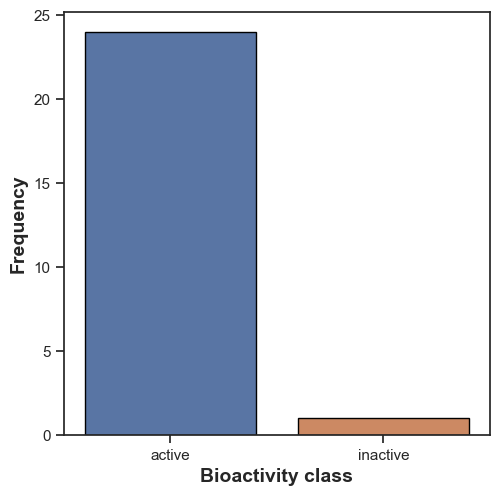

In [ ]:
plt.figure(figsize = (5.5, 5.5))
sns.countplot(x='bioactivity_class', data = df_2class, edgecolor = 'black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize= 14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

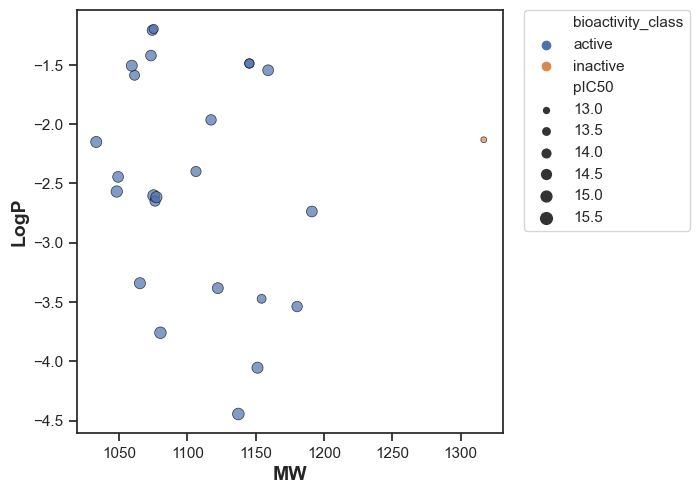

In [ ]:
# Scatter plot of MW versus LogP
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='Mw', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('plot_of_MW_vs_LogP.pdf')
plt.show()



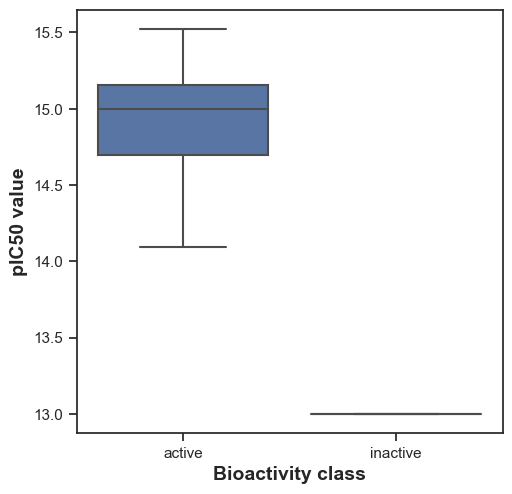

In [ ]:
# boxplot for pIC50 value

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50 value', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_ic50.pdf')
plt.show()


In [ ]:
# statistical analysis || Mann-Whitney U test

import scipy.stats as stats

# Assuming you have the DataFrame 'df_2class'

# Extract the 'pIC50' values for the two bioactivity classes ('active' and 'inactive')
active_pIC50 = df_2class[df_2class['bioactivity_class'] == 'active']['pIC50']
inactive_pIC50 = df_2class[df_2class['bioactivity_class'] == 'inactive']['pIC50']

# Perform the Mann-Whitney U test
result = stats.mannwhitneyu(active_pIC50, inactive_pIC50, alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", result.statistic)
print("P-value:", result.pvalue)


Mann-Whitney U statistic: 24.0
P-value: 0.10987283192795426


In [ ]:
import pandas as pd
import scipy.stats as stats

def mannwhitney(descriptor, verbose=False):
    # actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df['bioactivity_class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df['bioactivity_class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = stats.mannwhitneyu(active, inactive)

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor': descriptor,
                            'Statistics': stat,
                            'p': p,
                            'alpha': alpha,
                            'Interpretation': interpretation}, index=[0])

    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results


In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,24.0,0.109873,0.05,Same distribution (fail to reject H0)


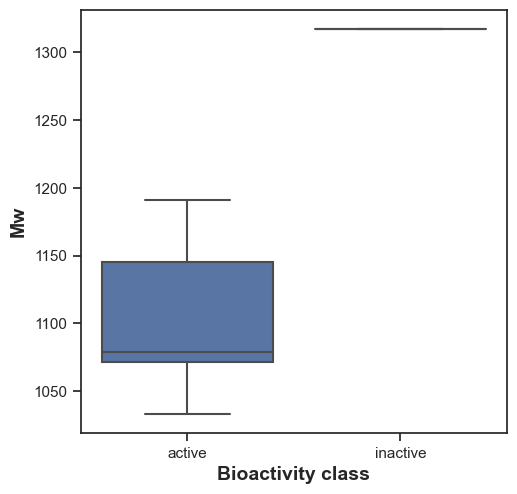

In [ ]:
# boxplot for pIC50 value

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'Mw', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Mw', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')
plt.show()

In [ ]:
mannwhitney('Mw')

,Descriptor,Statistics,p,alpha,Interpretation
0,Mw,0.0,0.110697,0.05,Same distribution (fail to reject H0)


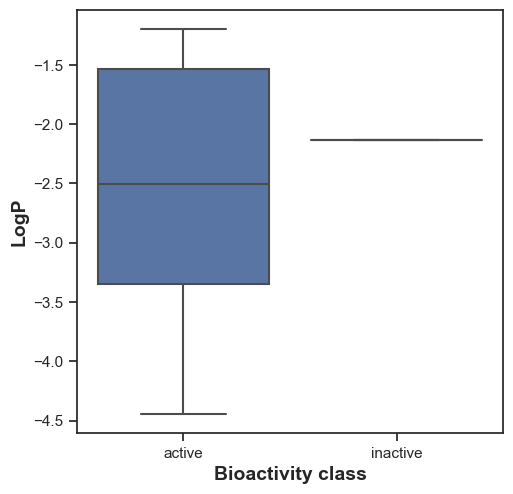

In [ ]:
# boxplot for pIC50 value

plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')
plt.show()

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,9.0,0.728776,0.05,Same distribution (fail to reject H0)


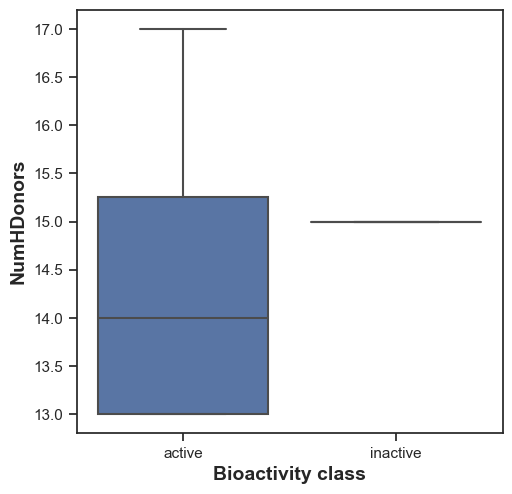

In [ ]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')
plt.show()

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7.5,0.5595,0.05,Same distribution (fail to reject H0)


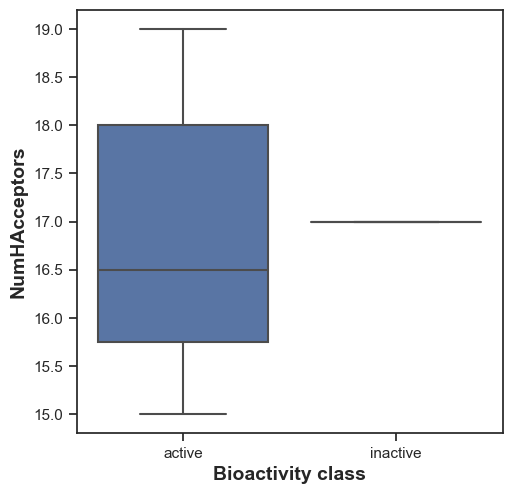

In [ ]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')
plt.show()

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,9.5,0.776469,0.05,Same distribution (fail to reject H0)
